<b> Objective : To Predict Sales at Datamart

In [25]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#Reading data from .csv file
data=pd.read_csv('Big_datamart.csv')
data.head(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
95,FDU04,NaN,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
96,FDF41,12.15,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300
97,FDB56,8.75,Regular,0.074613,Fruits and Vegetables,187.4556,OUT035,2004,Small,Tier 2,Supermarket Type1,3755.1120
98,NCP18,NaN,Low Fat,0.028460,Household,149.9708,OUT027,1985,Medium,Tier 3,Supermarket Type3,4363.6532


In [27]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<b> Identifying Null Values

In [28]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here we can see Item_Weight and Outlet_Size a having null values but these will not be the usefull in our prediction analysis.
So we can drop them instead of replacing the nulls with some numeric values.

In [29]:
data.drop('Item_Weight',inplace=True,axis=1)

In [30]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [31]:
data.drop('Outlet_Size',inplace=True,axis=1)

In [32]:
data.columns 

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

-----

<b> Checking the DataFrame details

In [33]:
data.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


<b> Data Visualisation 

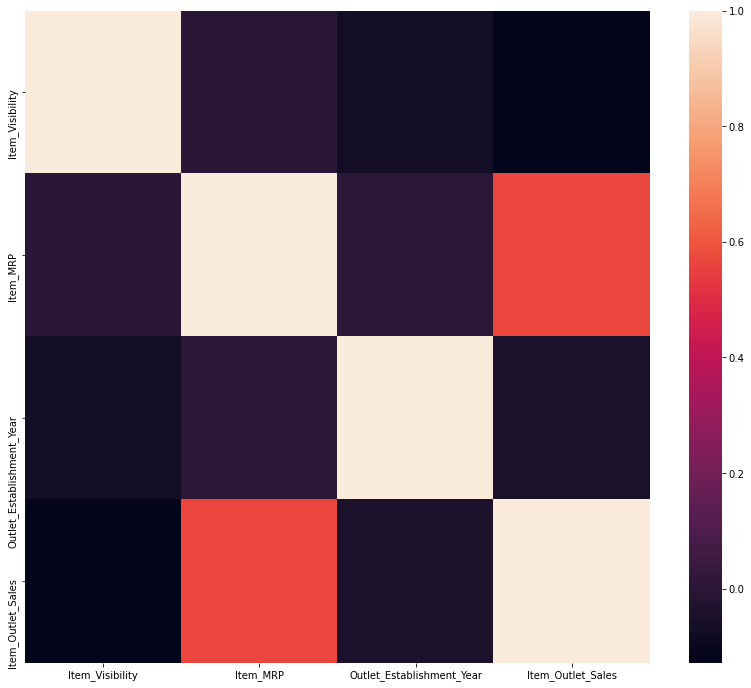

In [34]:
#using Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr())
plt.show()

Here we can see there is a corelation between Sales and MRP columns from Dataframe. Hence, Dropping all the other columns

------

<b>Using Linear Regression Algorithm

In [56]:
#using Linear regression

y=data['Item_Outlet_Sales']
x=data.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
        'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],axis=1)

In [41]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [57]:
x

,Item_MRP
0,249.8092
1,48.2692
2,141.6180
3,182.0950
4,53.8614
...,...
8518,214.5218
8519,108.1570
8520,85.1224
8521,103.1332


Importing Regression Model Libraries

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [59]:
scaler = MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Item_MRP
0,0.927507
1,0.072068
2,0.468288
3,0.640093
4,0.095805
...,...
8518,0.777729
8519,0.326263
8520,0.228492
8521,0.304939


In [60]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [61]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
print (model.score(X_test,y_test))

0.31562707430074344
